## Import Library

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ikram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ikram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading Dataset

In [2]:
review_df = pd.read_csv('ulasan_aplikasi_full.csv')
review_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7017160a-5215-4aa7-a0f5-c631b57c2db4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong dong ini aplikasi nya di perbaiki.. mas...,1,0,2.2.0,2025-04-12 14:19:51,"Halo Sahabat @Tuti Trimurti, mohon maaf atas k...",2025-04-12 15:59:24,2.2.0
1,1b3b0fa7-c945-4c50-af7e-7579bbe7797b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,baru bikin udah gak bisa dibuka aneh giliran g...,1,0,2.2.0,2025-04-12 13:48:41,"Halo Sahabat @Annasya violenzia Azzahra, mohon...",2025-04-12 15:59:30,2.2.0
2,6e4eaf9b-fab1-494d-984a-5038de6b5e3f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa ini kok masih dalam pemeliharaan terus,1,0,2.2.0,2025-04-12 13:39:19,"Halo Sahabat @Budi Purnomo, mohon maaf atas ke...",2025-04-12 15:59:36,2.2.0
3,9797a01f-1f4a-4429-ae57-4f70fb779fcb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sulit ngescan wajah masa ga kebaca terus, apa ...",1,0,2.2.0,2025-04-12 13:21:11,"Halo Sahabat @Ilmi Muhamad, mohon maaf atas ke...",2025-04-12 13:27:36,2.2.0
4,d15040e7-2553-4bbc-8e47-adcf5d19ba5b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ga bisa buat transfer dan buat token. sebelumn...,1,0,2.2.0,2025-04-12 13:19:40,"Halo Sahabat @dwi widodo, mohon maaf atas keti...",2025-04-12 13:27:44,2.2.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,bb0373df-0959-4299-bb41-d230a4996d90,lukman marzuki,https://play-lh.googleusercontent.com/a-/ALV-U...,Tau tau aplikasi keluar sendiri sy pikir suruh...,1,2,2.1.0,2024-11-29 17:44:24,"Halo Sahabat @lukman marzuki, mohon maaf atas ...",2024-11-29 18:58:06,2.1.0
14996,bdeb561e-3301-4f50-aa8d-0c789470eb27,verdy yohandre,https://play-lh.googleusercontent.com/a/ACg8oc...,Kenpa gag bisa di bukak habis d perbarui ?? Ma...,1,0,1.5.0,2024-11-29 17:44:22,"Hi Sahabat @verdy yohandre, mohon maaf atas ke...",2024-11-29 18:13:17,1.5.0
14997,d791858e-28f5-4871-8e19-73a244b1c492,muhammad yasin,https://play-lh.googleusercontent.com/a-/ALV-U...,Sering eror,5,0,2.1.0,2024-11-29 17:38:54,"Halo Sahabat @Muhammad Yasin, mohon maaf atas ...",2024-11-29 18:58:31,2.1.0
14998,b4c18669-3341-4b7f-9db0-3debe37740dd,Uzzaman Sidarta,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya sudah habis pulsa 20k ga bisa masuk dafta...,1,0,NaN,2024-11-29 17:36:19,"Hi Sahabat @Uzzaman Sidarta, mohon maaf atas k...",2024-11-29 18:14:25,NaN


In [3]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  11837 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          12825 non-null  object
 9   repliedAt             12825 non-null  object
 10  appVersion            11837 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [4]:
review_df = review_df.dropna()

In [5]:
review_df.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64

## Preprocessing

In [6]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]', '', text)
    text = re.sub(r'#[A-Za-z0-9]', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words) 
    return stemmed_text
 
def toSentence(list_words): 
    sentence = ' '.join(word for word in list_words)
    return sentence

In [7]:
slangwords = {
    "@": "di",
    "abis": "habis",
    "wtb": "beli",
    "masi": "masih",
    "wts": "jual",
    "wtt": "tukar",
    "bgt": "banget",
    "maks": "maksimal", 
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
    
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [8]:
review_df['text_clean'] = review_df['content'].apply(cleaningText)
review_df['text_casefoldingText'] = review_df['text_clean'].apply(casefoldingText)
review_df['text_slangwords'] = review_df['text_casefoldingText'].apply(fix_slangwords)
review_df['text_tokenizingText'] = review_df['text_slangwords'].apply(tokenizingText)
review_df['text_stopword'] = review_df['text_tokenizingText'].apply(filteringText)
review_df['text_akhir'] = review_df['text_stopword'].apply(toSentence)

In [9]:
review_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,7017160a-5215-4aa7-a0f5-c631b57c2db4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong dong ini aplikasi nya di perbaiki.. mas...,1,0,2.2.0,2025-04-12 14:19:51,"Halo Sahabat @Tuti Trimurti, mohon maaf atas k...",2025-04-12 15:59:24,2.2.0,Tolong dong ini aplikasi nya di perbaiki masa ...,tolong dong ini aplikasi nya di perbaiki masa ...,tolong dong ini aplikasi nya di perbaiki masa ...,"[tolong, dong, ini, aplikasi, nya, di, perbaik...","[tolong, aplikasi, perbaiki, pasword, suruh, g...",tolong aplikasi perbaiki pasword suruh ganti y...
1,1b3b0fa7-c945-4c50-af7e-7579bbe7797b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,baru bikin udah gak bisa dibuka aneh giliran g...,1,0,2.2.0,2025-04-12 13:48:41,"Halo Sahabat @Annasya violenzia Azzahra, mohon...",2025-04-12 15:59:30,2.2.0,baru bikin udah gak bisa dibuka aneh giliran g...,baru bikin udah gak bisa dibuka aneh giliran g...,baru bikin udah gak bisa dibuka aneh giliran g...,"[baru, bikin, udah, gak, bisa, dibuka, aneh, g...","[bikin, udah, dibuka, aneh, giliran, saldonya,...",bikin udah dibuka aneh giliran saldonya aman a...
2,6e4eaf9b-fab1-494d-984a-5038de6b5e3f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa ini kok masih dalam pemeliharaan terus,1,0,2.2.0,2025-04-12 13:39:19,"Halo Sahabat @Budi Purnomo, mohon maaf atas ke...",2025-04-12 15:59:36,2.2.0,kenapa ini kok masih dalam pemeliharaan terus,kenapa ini kok masih dalam pemeliharaan terus,kenapa ini kok masih dalam pemeliharaan terus,"[kenapa, ini, kok, masih, dalam, pemeliharaan,...",[pemeliharaan],pemeliharaan
3,9797a01f-1f4a-4429-ae57-4f70fb779fcb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sulit ngescan wajah masa ga kebaca terus, apa ...",1,0,2.2.0,2025-04-12 13:21:11,"Halo Sahabat @Ilmi Muhamad, mohon maaf atas ke...",2025-04-12 13:27:36,2.2.0,sulit ngescan wajah masa ga kebaca terus apa h...,sulit ngescan wajah masa ga kebaca terus apa h...,sulit ngescan wajah masa ga kebaca terus apa h...,"[sulit, ngescan, wajah, masa, ga, kebaca, teru...","[sulit, ngescan, wajah, kebaca, bank, cuman, v...",sulit ngescan wajah kebaca bank cuman verifika...
4,d15040e7-2553-4bbc-8e47-adcf5d19ba5b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ga bisa buat transfer dan buat token. sebelumn...,1,0,2.2.0,2025-04-12 13:19:40,"Halo Sahabat @dwi widodo, mohon maaf atas keti...",2025-04-12 13:27:44,2.2.0,ga bisa buat transfer dan buat token sebelumny...,ga bisa buat transfer dan buat token sebelumny...,ga bisa buat transfer dan buat token sebelumny...,"[ga, bisa, buat, transfer, dan, buat, token, s...","[transfer, token, gpp]",transfer token gpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,20475a52-f248-4609-81f1-38c4be35e361,sangkur klawu,https://play-lh.googleusercontent.com/a-/ALV-U...,kasih notif donk min...masa mode silent...,4,0,2.1.0,2024-11-29 17:56:34,Hai Sahabat @sangkur klawu. Terima kasih atas ...,2024-11-29 18:12:49,2.1.0,kasih notif donk minmasa mode silent,kasih notif donk minmasa mode silent,kasih notif donk minmasa mode silent,"[kasih, notif, donk, minmasa, mode, silent]","[kasih, notif, donk, minmasa, mode, silent]",kasih notif donk minmasa mode silent
14994,2bd61ccc-244f-4f4e-9a53-17a8ce7657a6,candra sasmita,https://play-lh.googleusercontent.com/a/ACg8oc...,Terlalu banyak fitur yg gak perlu mala membuat...,2,1,2.1.0,2024-11-29 17:44:24,Hai Sahabat @candra sasmita. Terima kasih atas...,2024-11-29 18:14:04,2.1.0,Terlalu banyak fitur yg gak perlu mala membuat...,terlalu banyak fitur yg gak perlu mala membuat...,terlalu banyak fitur yg gak perlu mala membuat...,"[terlalu, banyak, fitur, yg, gak, perlu, mala,...","[fitur, yg, mala, lemot, kayaknya, versi, lite...",fitur yg mala lem

## Pelabelan

In [10]:
import csv
import requests
from io import StringIO
 
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
 
if response.status_code == 200:
    
    reader = csv.reader(StringIO(response.text), delimiter=',')
 
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")
 
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
 
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
 
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [11]:
def sentiment_analysis_lexicon_indonesia(text):
 
    score = 0
 
    for word in text:
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
 
    for word in text: 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
 
    polarity=''
 
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
 
    return score, polarity

In [12]:
results = review_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
review_df['polarity_score'] = results[0]
review_df['polarity'] = results[1]
review_df['polarity'].value_counts()

polarity
positive    5456
negative    4639
Name: count, dtype: int64

## Visualisasi Hasil

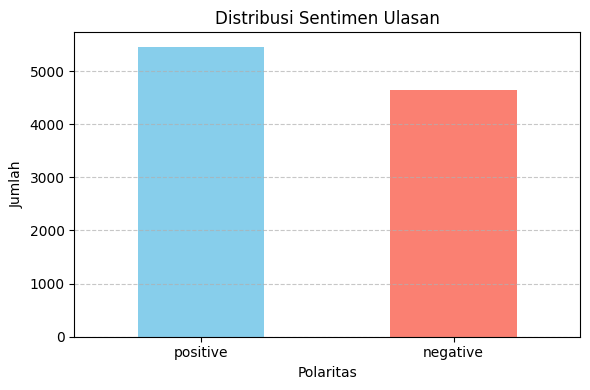

In [13]:
polarity_counts = review_df['polarity'].value_counts()

plt.figure(figsize=(6, 4))
polarity_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Sentimen Ulasan')
plt.xlabel('Polaritas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
text_positive = ' '.join(review_df[review_df['polarity'] == 'positive']['text_akhir'])
text_negative = ' '.join(review_df[review_df['polarity'] == 'negative']['text_akhir'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text_negative)

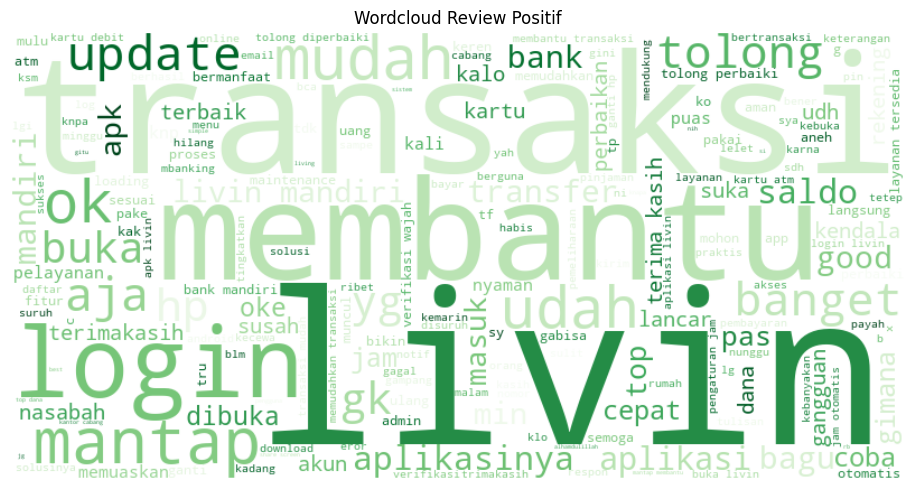

In [15]:
plt.figure(figsize=(10, 5))
plt.title('Wordcloud Review Positif')
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

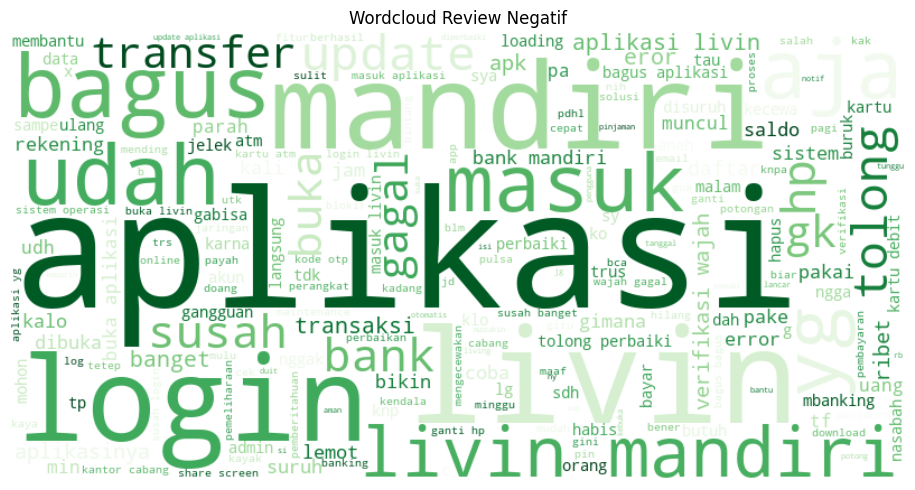

In [16]:
plt.figure(figsize=(10, 5))
plt.title('Wordcloud Review Negatif')
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## Data Splitting dan Ektraksi Fitur

## Modeling

### LSTM

#### Splitting Data

In [18]:
from sklearn.model_selection import train_test_split 

texts = review_df['text_akhir'].astype(str).tolist()  
labels = review_df['polarity'].tolist()  

review_df['label_binary'] = review_df['polarity'].apply(lambda x: 1 if x == 'positive' else 0)
labels = review_df['label_binary'].tolist()


X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

#### Training Data

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# ========== 1. Data Preprocessing (Tokenization + Padding) ==========
max_vocab = 10000
max_len = 100

# Tokenizer untuk teks
tokenizer = Tokenizer(num_words=max_vocab, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)

# Ubah teks menjadi sequence integer
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Padding sequence agar panjangnya sama
X_train = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# ========== 2. Label Encoding ==========
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# ========== 3. Build LSTM Model ==========
model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ========== 4. Training ==========
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10


c:\Users\ikram\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.6862 - loss: 0.5517 - val_accuracy: 0.8539 - val_loss: 0.3328
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9169 - loss: 0.2162 - val_accuracy: 0.9163 - val_loss: 0.2213
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9755 - loss: 0.0726 - val_accuracy: 0.9208 - val_loss: 0.2386
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9921 - loss: 0.0282 - val_accuracy: 0.9237 - val_loss: 0.2600
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9954 - loss: 0.0181 - val_accuracy: 0.9203 - val_loss: 0.2838
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.9242 - val_loss: 0.3059
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9963 - loss: 0.0133 - val_accuracy: 0.9059 - val_loss: 0.3895
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9911 - loss: 0.0242 - val_accurac

#### Evaluating Model

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
[[ 853   59]
 [ 106 1001]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       912
           1       0.94      0.90      0.92      1107

    accuracy                           0.92      2019
   macro avg       0.92      0.92      0.92      2019
weighted avg       0.92      0.92      0.92      2019



### Naive Bayes

#### Data Splitting dan Extraksi Fitur TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = review_df['text_akhir'].astype(str).tolist()  
y = review_df['polarity'].tolist()
 
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)
 
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
 
features_df
 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

#### Training Model

In [23]:
from sklearn.naive_bayes import BernoulliNB
 
naive_bayes = BernoulliNB()
 
naive_bayes.fit(X_train.toarray(), y_train)
 
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())
 
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)
 
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7731550272412085
Naive Bayes - accuracy_test: 0.7870232788509163
